# 귀펭 (귀여운 펭귄처럼) 미니 프로젝트
* 목적: 남부터미널 근처의 괜찮은 음식점 찾아보기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-컬럼명-통일" data-toc-modified-id="2.1-컬럼명-통일-2.1">2.1 컬럼명 통일</a></span></li><li><span><a href="#2.2-결측값-처리" data-toc-modified-id="2.2-결측값-처리-2.2">2.2 결측값 처리</a></span></li><li><span><a href="#2.2-address-컬럼" data-toc-modified-id="2.2-address-컬럼-2.3">2.2 address 컬럼</a></span></li><li><span><a href="#2.3-eval_cnt,-review_cnt" data-toc-modified-id="2.3-eval_cnt,-review_cnt-2.4">2.3 eval_cnt, review_cnt</a></span><ul class="toc-item"><li><span><a href="#2.3.1-eval_cnt" data-toc-modified-id="2.3.1-eval_cnt-2.4.1">2.3.1 eval_cnt</a></span></li><li><span><a href="#2.3.2-review_cnt" data-toc-modified-id="2.3.2-review_cnt-2.4.2">2.3.2 review_cnt</a></span></li><li><span><a href="#2.3.3-컬럼-데이터-형식-변경" data-toc-modified-id="2.3.3-컬럼-데이터-형식-변경-2.4.3">2.3.3 컬럼 데이터 형식 변경</a></span></li></ul></li><li><span><a href="#2.4-join" data-toc-modified-id="2.4-join-2.5">2.4 join</a></span></li><li><span><a href="#2.4-저장하기" data-toc-modified-id="2.4-저장하기-2.6">2.4 저장하기</a></span></li></ul></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3.1-데이터-분포" data-toc-modified-id="3.1-데이터-분포-3.1">3.1 데이터 분포</a></span></li><li><span><a href="#3.2-카테고리-확인" data-toc-modified-id="3.2-카테고리-확인-3.2">3.2 카테고리 확인</a></span></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from tqdm import tqdm_notebook

In [2]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [121]:
# 내가 크롤링한 데이터
df = pd.read_csv('source/restaurant_raw.csv', index_col=0)
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",(지번) 서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,(지번) 서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",(지번) 서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",(지번) 서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,(지번) 서초동 1564-4,3.9,15건,리뷰 126


In [122]:
# 윤성님이 크롤링한 데이터
df_2 = pd.read_csv('source/restaurant_raw_ys.csv', index_col=0)
df_2.head()

,name,category,star,star_count,review,address,위도,경도
0,루엘드파리,"제과,베이커리",3.9,72건,267,서울 서초구 서초중앙로 18 112호,37.484048,127.017349
1,공미학,커피전문점,3.5,12건,147,서울 서초구 서초대로48길 101 1층,37.488622,127.012470
2,봉산옥 서초동본점,국수,3.7,79건,146,서울 서초구 반포대로8길 5-6,37.483382,127.012453
3,장꼬방,"찌개,전골",3.2,299건,124,서울 서초구 효령로 364,37.486893,127.023663
4,해담채 남부터미널점,"해물,생선",3.1,10건,47,서울 서초구 서초중앙로5길 10-8 쁘띠오피스텔 지하1층,37.485865,127.015100


In [123]:
df.shape

(515, 6)

In [124]:
df_2.shape

(500, 8)

## 2. 데이터 전처리
* 결측값 확인하기
* 불필요한 문자 지우기
* 숫자 데이터는 숫자로 형식 바꿔주기
* 두 데이터 합치기

### 2.1 컬럼명 통일
* 일단 두 데이터의 컬럼명부터 통일시키자.

In [125]:
df.columns

Index(['name', 'category', 'address', 'score', 'eval_cnt', 'review_cnt'], dtype='object')

In [126]:
df_2.columns

Index(['name', 'category', 'star', 'star_count', 'review', 'address', '위도',
       '경도'],
      dtype='object')

In [127]:
df_2.rename(columns={'star': 'score',
                     'star_count': 'eval_cnt',
                     'review': 'review_cnt',
                     '위도': 'lat',
                     '경도': 'lng'},
            inplace=True)
df_2.head(2)

,name,category,score,eval_cnt,review_cnt,address,lat,lng
0,루엘드파리,"제과,베이커리",3.9,72건,267,서울 서초구 서초중앙로 18 112호,37.484048,127.017349
1,공미학,커피전문점,3.5,12건,147,서울 서초구 서초대로48길 101 1층,37.488622,127.012470


### 2.2 결측값 처리

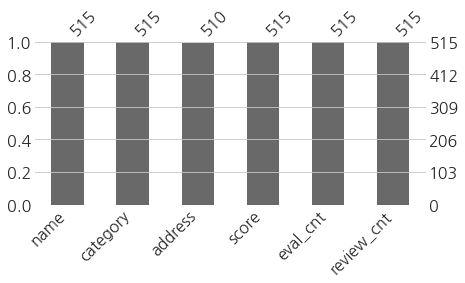

In [128]:
import missingno as msno
msno.bar(df, figsize=(7, 3))

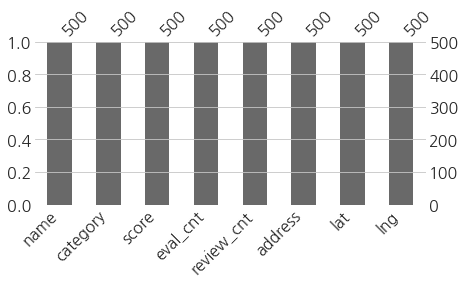

In [129]:
msno.bar(df_2, figsize=(7, 3))

* df의 address 에서 5개의 레코드가 빠져있다.

In [130]:
df[df.address.isnull()]

,name,category,address,score,eval_cnt,review_cnt
183,커피829 남부터미널점,커피전문점,NaN,5.0,1건,리뷰 11
293,전주콩나물해장국밥,국밥,NaN,0.0,0건,리뷰 0
333,왕솥뚜껑생삼겹살,한식,NaN,0.0,0건,리뷰 0
339,만랩커피 남부터미널점,커피전문점,NaN,0.0,0건,리뷰 0
467,몽돌바당,일식,NaN,0.0,0건,리뷰 0


In [131]:
for idx, index in enumerate(df[df.address.isnull()].index):
    df.loc[index, 'address'] = ['서초동 1588-8', '서초구 서초동 1428-4',
                                '서초동 1428-4', '서초동 1446-11', '서초동 1603-3'][idx]

* 직접 찾아서 주소 정보 넣어주기

In [132]:
df.iloc[183]

name          커피829 남부터미널점
category             커피전문점
address         서초동 1588-8
score                    5
eval_cnt                1건
review_cnt           리뷰 11
Name: 183, dtype: object

* 주소가 잘 들어가있다.

In [133]:
df[df.address.isnull()]

,name,category,address,score,eval_cnt,review_cnt


* 결측값이 모두 처리되었다.

### 2.2 address 컬럼
* 앞부분에 '(지번) '이 불필요하게 들어가있다. 이를 삭제하자.
* 단, 결측값 처리 시에는 (지번)을 함께 기재하지 않았으므로, 조건문으로 필터링!

In [134]:
for row in df.index:
    if df.address[row][:5] == '(지번) ':
        df.address[row] = df.address[row][5:]
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,서초동 1564-4,3.9,15건,리뷰 126


### 2.3 eval_cnt, review_cnt
* 숫자와 섞여있는 문자를 삭제하고
* 컬럼을 int형식으로 변경하자

In [135]:
df.head(1)

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72건,리뷰 267


In [136]:
df_2.head(1)

,name,category,score,eval_cnt,review_cnt,address,lat,lng
0,루엘드파리,"제과,베이커리",3.9,72건,267,서울 서초구 서초중앙로 18 112호,37.484048,127.017349


* eval_cnt는 df, df_2 둘 다,
* review_cnt는 df만 처리하면 됨

#### 2.3.1 eval_cnt
* 뒤의 '건'을 삭제하자.
* 삭제 전, 해당 컬럼의 모든 레코드가 '건' 이라는 글자로 끝나는지 확인하자

In [137]:
print('df:\n', df['eval_cnt'].apply(lambda x: str(x)[-1]).value_counts(), '\n',
      'df_2:\n', df_2['eval_cnt'].apply(lambda x: str(x)[-1]).value_counts())

df:
 건    515
Name: eval_cnt, dtype: int64 
 df_2:
 건    500
Name: eval_cnt, dtype: int64


* 확인 완료!

In [138]:
df['eval_cnt'] = df['eval_cnt'].apply(lambda x: str(x)[:-1])
df.head(3)

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,리뷰 267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,리뷰 146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,리뷰 124


In [139]:
df_2['eval_cnt'] = df_2['eval_cnt'].apply(lambda x: str(x)[:-1])
df_2.head(3)

,name,category,score,eval_cnt,review_cnt,address,lat,lng
0,루엘드파리,"제과,베이커리",3.9,72,267,서울 서초구 서초중앙로 18 112호,37.484048,127.017349
1,공미학,커피전문점,3.5,12,147,서울 서초구 서초대로48길 101 1층,37.488622,127.012470
2,봉산옥 서초동본점,국수,3.7,79,146,서울 서초구 반포대로8길 5-6,37.483382,127.012453


#### 2.3.2 review_cnt
* 이 컬럼에서는 앞에 문자열이 붙어있다. 해당 문자를 삭제하자.
* 역시 모든 레코드의 첫 두 글자가 '리뷰'로 시작하는지 먼저 확인

In [140]:
df.review_cnt.apply(lambda x:str(x)[:2]).value_counts()

리뷰    515
Name: review_cnt, dtype: int64

In [141]:
df.review_cnt = df.review_cnt.apply(lambda x: str(x)[3:])
df.head(3)

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",서초동 1445-13,3.9,72,267
1,봉산옥 서초동본점,국수,서초3동 1451-9,3.7,79,146
2,장꼬방,"찌개,전골",서초동 1438-8,3.2,299,124


#### 2.3.3 컬럼 데이터 형식 변경
* object to int32

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 6 columns):
name          515 non-null object
category      515 non-null object
address       515 non-null object
score         515 non-null float64
eval_cnt      515 non-null object
review_cnt    515 non-null object
dtypes: float64(1), object(5)
memory usage: 48.2+ KB


In [143]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
name          500 non-null object
category      500 non-null object
score         500 non-null float64
eval_cnt      500 non-null object
review_cnt    500 non-null int64
address       500 non-null object
lat           500 non-null float64
lng           500 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 35.2+ KB


In [144]:
# 중간에 오류가 나서 확인해보니 na 값(object)이 있어 수정
for row in df[df.eval_cnt == 'na'].index:
    df.loc[row, 'eval_cnt'] = 0

In [145]:
for row in df_2[df_2.eval_cnt == 'na'].index:
    df_2.loc[row, 'eval_cnt'] = 0

In [146]:
# df
df['eval_cnt'] = df['eval_cnt'].astype(int)
df['review_cnt'] = df['review_cnt'].astype(int)
# df_2
df['eval_cnt'] = df['eval_cnt'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 6 columns):
name          515 non-null object
category      515 non-null object
address       515 non-null object
score         515 non-null float64
eval_cnt      515 non-null int32
review_cnt    515 non-null int32
dtypes: float64(1), int32(2), object(3)
memory usage: 44.1+ KB


In [147]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
name          500 non-null object
category      500 non-null object
score         500 non-null float64
eval_cnt      500 non-null object
review_cnt    500 non-null int64
address       500 non-null object
lat           500 non-null float64
lng           500 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 35.2+ KB


### 2.4 join
* 전처리를 완료했으니 두 데이터를 join시키자.
* 일단 df_2에 있는 위치정보는 무시하고, df에 join시키자.

In [148]:
# 일단 두 데이터를 합치기
df = pd.concat([df, df_2.drop(['lat', 'lng'], axis=1)]).reset_index(drop=True)
df.tail(3)

,address,category,eval_cnt,name,review_cnt,score
1012,서울 서초구 사임당로 25,술집,0,오키드,0,0.0
1013,서울 서초구 서초중앙로5길 10-8,카페,0,아이비,0,0.0
1014,서울 서초구 사임당로 58 제일빌딩,분식,0,맛나스넥,0,0.0


In [164]:
df.drop(df[df.name.duplicated()].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(2)

,address,category,eval_cnt,name,review_cnt,score
0,서초동 1445-13,"제과,베이커리",72,루엘드파리,267,3.9
1,서초3동 1451-9,국수,79,봉산옥 서초동본점,146,3.7


In [166]:
df.tail(2)

,address,category,eval_cnt,name,review_cnt,score
516,서울 서초구 사임당로 21,실내포장마차,0,진심야식당,0,0.0
517,서울 서초구 사임당로 58 제일빌딩,분식,0,맛나스넥,0,0.0


In [167]:
df.shape

(518, 6)

* 두 데이터에서 중복되지 않는 곳을 걸렀더니, 518곳이 필터링되었다.
* 실질적으로 안 겹친 음식점은 3곳이었던 것이네.. (ㅡㅡ...)

### 2.4 저장하기
* 전처리가 완료되었으니, 이제 저장을 하자!

In [168]:
df.to_csv('./source/restaurant_preprocessed(merged).csv')

## 3. 데이터 살펴보기

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
address       518 non-null object
category      518 non-null object
eval_cnt      518 non-null object
name          518 non-null object
review_cnt    518 non-null int64
score         518 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 24.4+ KB


In [178]:
df.describe()

,eval_cnt,review_cnt,score
count,518.000000,518.000000,518.000000
mean,4.880309,10.212355,2.134170
std,15.854182,27.517135,1.949679
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.500000
75%,5.000000,7.000000,4.000000
max,299.000000,274.000000,5.000000


* 왜 또다시 eval_cnt가 object로 변한것일까..?

In [177]:
df.eval_cnt = df.eval_cnt.astype('int')

### 3.1 데이터 분포
* 수치형 데이터들의 분포를 알아보자.

In [183]:
df.describe()

,eval_cnt,review_cnt,score
count,518.000000,518.000000,518.000000
mean,4.880309,10.212355,2.134170
std,15.854182,27.517135,1.949679
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.500000
75%,5.000000,7.000000,4.000000
max,299.000000,274.000000,5.000000


* 별점은 평균 2.1점이다.
    * 3점에 아까울 줄 알았는데,생각보다는 낮다.
* 별점 평가는 평균 약 5건으로, 많지는 않다.
* 리뷰(블로그 등)의 수가 평균 10건으로 오히려 별점 평가 수보다 더 많았다.
    * 카카오맵 내에서 제공되는 리뷰는 다음, 네이버 등 다른 도메인의 리뷰도 함께 카운트되기 때문에 그럴것이다.

In [201]:
def numeric_plot(df, col):
    f, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.boxplot(df[col], ax=ax[0])
    ax[0].set_title('Boxplot of {}'.format(col))
    
    sns.distplot(df[col], ax=ax[1])
    ax[1].set_title('Histplot of {}'.format(col))    

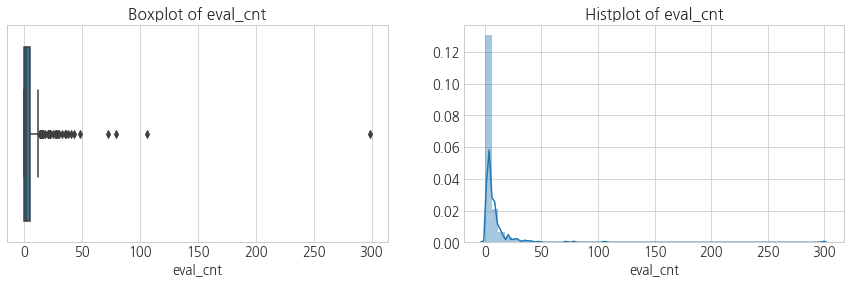

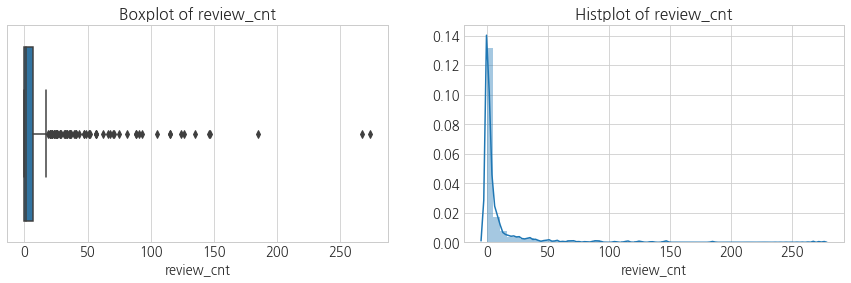

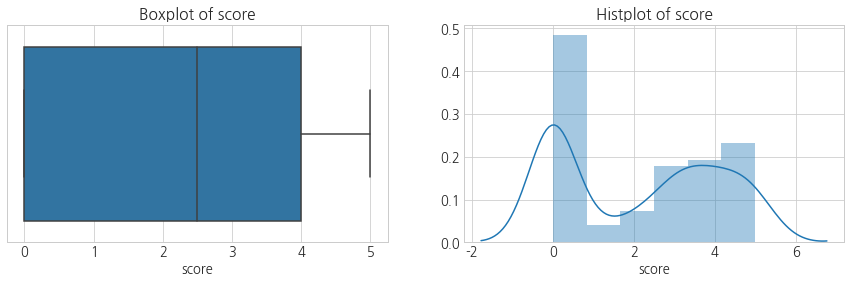

In [202]:
for col in ['eval_cnt', 'review_cnt', 'score']:
    numeric_plot(df, col)

* 0 혹은 0과 가까운 데이터들이 많은 것을 알 수 있다.
    * 실제로 평가가 아직 안 되거나 적게 된 곳이 많다는 의미
* 평가가 적게 된 곳도 많으므로, 좋은 음식점을 가려낼 때 '평점만' 고려하면 안 되겠다.
    * 평가가 특정 수 이상 되는 음식점만 고르는 등의 필터링을 거쳐야할 듯.

* 일단 맛보기로, 평가가 10회 이상 이뤄진 음식점을 추려 다시 분포를 그려보자.

In [217]:
df_cnt_over_10 = df[df.review_cnt >= 10]
df_cnt_over_10.shape

(102, 6)

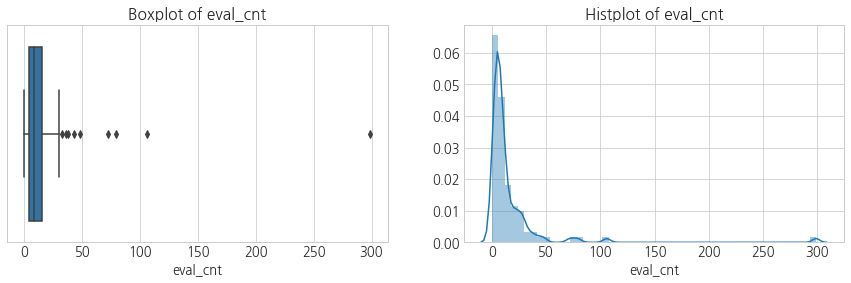

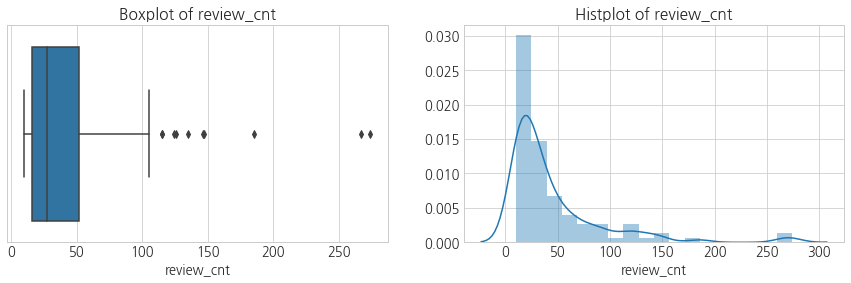

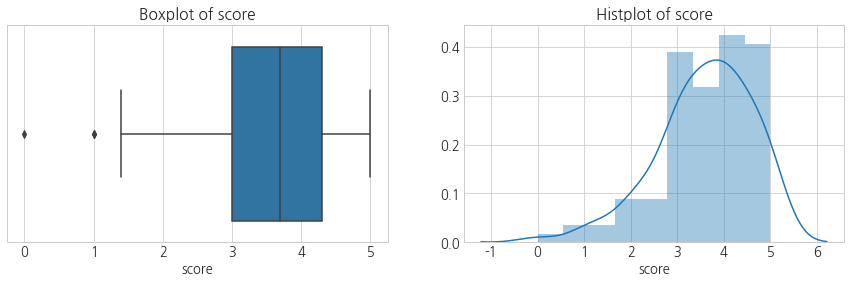

In [218]:
for col in ['eval_cnt', 'review_cnt', 'score']:
    numeric_plot(df_cnt_over_10, col)

* review_cnt와 eval_cnt는 여전히 왼쪽으로 쏠린 분포이다.
* 하지만, score는 오른쪽 쏠림 분포로 이동하였고, 
    * 3점 이상 받은 음식점이 많은 것을 알 수 있다.

In [219]:
df_eval = df[df.eval_cnt>0]

* 일단 평가를 1회 이상 받은 곳은 따로 저장해두자.

In [185]:
# 컬럼 순서 변경
df = df[['name', 'category', 'score', 'eval_cnt', 'review_cnt', 'address']]

### 3.2 카테고리 확인
* 음식점을 카테고리별로 확인하면, 좋은 인사이트가 나올 것 같다.
* 어떤 카테고리를 가진 음식점이 많은지 확인해보자.

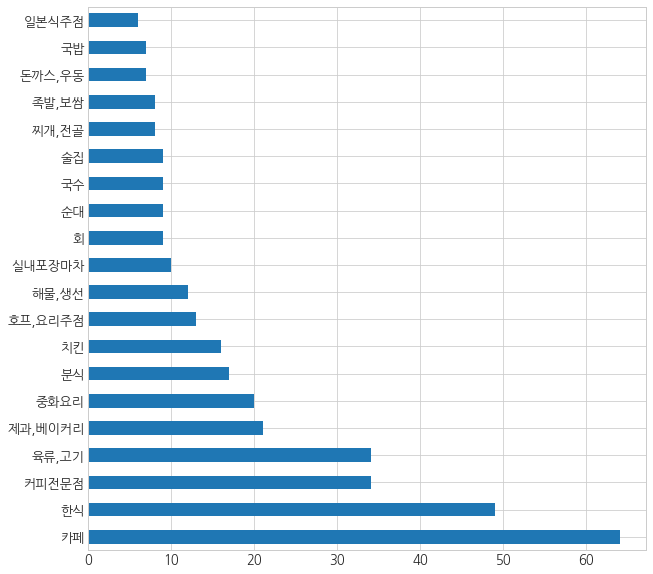

In [103]:
df.category.value_counts().sort_values(ascending=False)[:20].plot('barh', figsize=(10, 10))